# 回归

所谓回归既是预测连续型数值，反之既是对应标称型数据的分类；

In [3]:
from numpy import *

import matplotlib.pyplot as plt

%matplotlib inline

dataPath = '../../../git_mlaction/machinelearninginaction/Ch08/'

## 用线性回归找到最佳拟合直线

回归通常指线性回归，即每个特征值乘以相应的回归系数再相加，和既是预测的连续值，而求回归系数的过程即称之为回归，当然回归也有非线性的回归；

线性回归：
* 优点：结果易于理解，计算上不复杂；
* 缺点：对非线性数据拟合不好；
* 适用数据类型：数值型和标称型；

所谓拟合直线，即用一条直线（决策平面？？？）尽可能多的经过所有数据点，所谓预测就是将输入带入直线的方程，得到输出；

所谓“回归”过程，即是求最小误差的过程，因此又是一个最优问题（之前遇到过LR，使用GA和随机GA解决），这里我们使用OLS（普通最小二乘法）来解决；

In [4]:
# 加载数据
def loadDataSet(fn = dataPath+'ex0.txt'):
    dataArr, labelArr = [], []
    with open(fn) as f:
        for line in f.readlines():
            features = line.strip().split('\t')
            dataArr.append([float(features[i]) for i in range(len(features)-1)])
            labelArr.append(float(features[-1]))
    return dataArr, labelArr

xArr, yArr = loadDataSet()

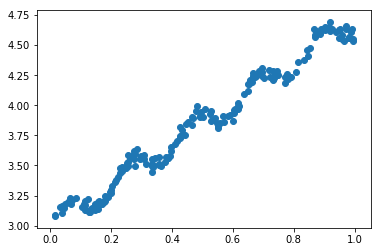

In [16]:
plt.scatter(array(xArr)[:,1], array(yArr))

In [17]:
# 计算最佳拟合直线，利用OLS公式
def standRegres(xArr, yArr):
    xMat, yMat = mat(xArr), mat(yArr).T
    xTx = xMat.T * xMat
    if linalg.det(xTx) == 0.0: # 判断矩阵是否有逆
        print 'This matrix is singular, cannot do inverse.'
        return
    return xTx.I * xMat.T * yMat

In [18]:
ws = standRegres(xArr, yArr)
ws

matrix([[ 3.00774324],
        [ 1.69532264]])

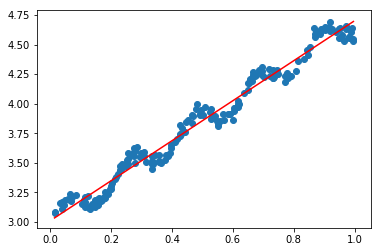

In [20]:
plt.scatter(array(xArr)[:,1], array(yArr))
xArrCopy = mat(xArr).copy()
xArrCopy.sort(0)
yHat = xArrCopy*ws
plt.plot(xArrCopy[:,1], yHat, c='r')

可以看到，简单的OLS，即得到了看起来相当不错的结果，如果要评估拟合的好坏，可以通过计算yHat和yMat的相关系数（corr）来观察结果；

## 局部加权线性回归 - LWLR

可以看到线性回归的一个问题是会导致欠拟合，原因是它求得是具有**最小均方误差的无偏估计**，实际数据大部分都不是严格符合线性的，因此有些方法允许引入一些偏差，来降低预测的误差；

所谓**局部加权**的意思是说在**训练前**，通过利用**高斯核**，并设置**k**值，来对原始数据的计算一个对应的权重矩阵，距离预测点的已知特征（比如输入特征为x）越近的点会得到越大的权重，通过公式可知，k越大，最终使用的数据越多，k越小，训练使用的数据越少；

因此LWLR类似kNN的，没有训练过程，每次预测都是基于选择的训练数据集预测的；

懂了：所谓k值计算的权重，其实就是说在对预测点进行预测时，所利用的数据是哪些，假如k为1.0，那么就是说对于任何点预测，都是利用所有数据，且权重一致，当k为0.03时，就更加多的利用最考虑预测点的数据，而弱化远处的点在预测中起到的作用，因此当k太小时，会过拟合，而太大时，会欠拟合；

In [52]:
# lwlr实现，相对于直接用OLS，多了计算权重对角矩阵，已经应用该矩阵的步骤
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat, yMat = mat(xArr), mat(yArr).T
    xTx = xMat.T * xMat
    # 计算对角矩阵
    weights = mat(eye((shape(xMat)[0])))
    for i in range(shape(xMat)[0]):
        diffMat = testPoint - xMat[i,:] # 计算测试点与其他数据点的距离
        weights[i,i] = exp((diffMat*diffMat.T)/(-2*k**2))
    if linalg.det(xTx) == 0.0: # 判断矩阵是否有逆
        print 'This matrix is singular, cannot do inverse.'
        return
    return testPoint * ((xMat.T * weights * xMat).I * xMat.T * weights * yMat)

In [53]:
def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [74]:
xArr, yArr = loadDataSet()
xArrCopy = mat(xArr).copy()
xArrCopy.sort(0)

yHat_1 = lwlrTest(xArrCopy, xArr, yArr)
yHat_2 = lwlrTest(xArrCopy, xArr, yArr, k=0.5)
yHat_3 = lwlrTest(xArrCopy, xArr, yArr, k=0.25)
yHat_4 = lwlrTest(xArrCopy, xArr, yArr, k=0.1)
yHat_5 = lwlrTest(xArrCopy, xArr, yArr, k=0.05)
yHat_6 = lwlrTest(xArrCopy, xArr, yArr, k=0.025)
yHat_7 = lwlrTest(xArrCopy, xArr, yArr, k=0.005)
print(yHat_1[:5])
print(yHat_4[:5])
print(yHat_7[:5])

[ 3.03242227  3.03329674  3.06462993  3.07220096  3.07586196]
[ 3.11235688  3.11264708  3.12383051  3.1268014   3.12828104]
[ 3.07973692  3.08317818  3.14621321  3.14158405  3.14531314]


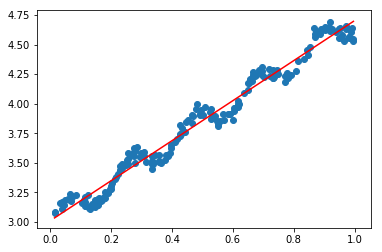

In [76]:
plt.scatter(array(xArr)[:,1], array(yArr))
plt.plot(xArrCopy[:,1], yHat_1, c='r')

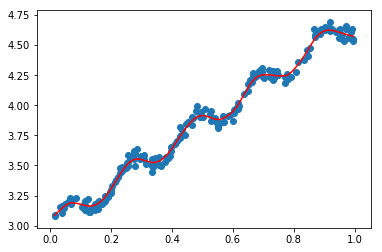

In [77]:
plt.scatter(array(xArr)[:,1], array(yArr))
plt.plot(xArrCopy[:,1], yHat_6, c='r')

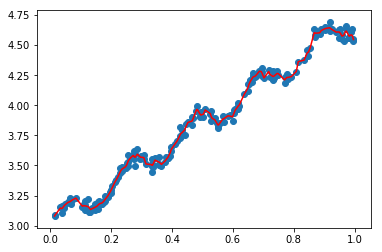

In [78]:
plt.scatter(array(xArr)[:,1], array(yArr))
plt.plot(xArrCopy[:,1], yHat_7, c='r')

可以看到在k为0.025时，拟合线基本学习到了数据的模式，而在0.005时，则引入了太多噪声点，明显过拟合情况出现，同样的因为引入局部加权后，每次预测都要计算整个数据集，因此计算时间增加了，且如果设置k较小时，其实大部分数据点的权重都是0；

## 示例：预测鲍鱼的年龄

In [79]:
# 定义误差平方和函数统计误差
def rssError(yAct, yHat):
    return ((yHat - yAct)**2).sum()

In [80]:
abX, abY = loadDataSet(fn=dataPath+'abalone.txt')

In [82]:
print rssError(abY[0:100], lwlrTest(abX[0:100], abX[0:100], abY[0:100], 10))
print rssError(abY[0:100], lwlrTest(abX[0:100], abX[0:100], abY[0:100], 5))
print rssError(abY[0:100], lwlrTest(abX[0:100], abX[0:100], abY[0:100], 1))
print rssError(abY[0:100], lwlrTest(abX[0:100], abX[0:100], abY[0:100], 0.5))
print rssError(abY[0:100], lwlrTest(abX[0:100], abX[0:100], abY[0:100], 0.1))

549.256123395
543.816215484
432.459782941
338.455728008
57.5914875352


In [83]:
print rssError(abY[100:200], lwlrTest(abX[100:200], abX[0:100], abY[0:100], 10))
print rssError(abY[100:200], lwlrTest(abX[100:200], abX[0:100], abY[0:100], 5))
print rssError(abY[100:200], lwlrTest(abX[100:200], abX[0:100], abY[0:100], 1))
print rssError(abY[100:200], lwlrTest(abX[100:200], abX[0:100], abY[0:100], 0.5))
print rssError(abY[100:200], lwlrTest(abX[100:200], abX[0:100], abY[0:100], 0.1))

522.024391426
519.403143581
577.080086879
762.341383247
40605.4873007


可以看到，在训练集上，k越小，误差平方和越小，但是在测试集上，当k为5时，误差平方和最小，这就是因为k过小，导致了过拟合的情况；

## 缩减系数来“理解”数据

如果特征数比样本点还多，我们就无法使用线性回归来做预测，因为当n大于m时，输入矩阵求逆会有问题，因此需要对系数进行缩减：
* 岭回归；
* lasso、前向逐步回归；

### 岭回归

### lasso

### 前向逐步回归

## 权衡偏差和方差

即学习曲线，理论上找到测试曲线的最低点对应的模型参数；

## 示例：预测乐高玩具套装的价格

## 小结

与分类不同的是，回归算法预测的是连续值，因此它的指标通常使用误差平方和来表示，而使用线性回归，我们可以以一条直线来拟合数据，但是这通常有欠拟合问题，因此我们更常使用的是局部加权线性回归，通过设置k值，来指定具体预测点越近的数据是否具有越高的权重，当k很小时，只有预测点附近的部分点才在预测中生效，注意，k值太小会引入过多噪声，导致过拟合问题；

当特征数多于样本数时，不能直接使用线性回归，而要通过缩减系数的方式，否则求逆过程会出问题，缩减的方式有很多种，比如岭回归、lasso、前向逐步回归等等；

对于一个模型，应尽可能找到对应学习曲线中的测试误差最低点对应的模型参数；